1. Data Loading and Preprocessing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'/content/heart-disease.csv')

# Handle missing values if any (impute or dropna as per dataset needs)
df = df.dropna()  # For simplicity, assuming dropping NA rows for this example

# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'])

# Display first few rows to understand the dataset
print(df.head())


   age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  target  ...  \
0   63    1       145   233    1      150      0      2.3   0       1  ...   
1   37    1       130   250    0      187      0      3.5   0       1  ...   
2   41    0       130   204    0      172      0      1.4   0       1  ...   
3   56    1       120   236    0      178      0      0.8   0       1  ...   
4   57    0       120   354    0      163      1      0.6   0       1  ...   

   restecg_0  restecg_1  restecg_2  slope_0  slope_1  slope_2  thal_0  thal_1  \
0       True      False      False     True    False    False   False    True   
1      False       True      False     True    False    False   False   False   
2       True      False      False    False    False     True   False   False   
3      False       True      False    False    False     True   False   False   
4      False       True      False    False    False     True   False   False   

   thal_2  thal_3  
0   False   False  
1   

2. Data Analysis

In [6]:
# Calculate the average age of patients with and without heart disease
avg_age_heart_disease = df[df['target'] == 1]['age'].mean()
avg_age_no_heart_disease = df[df['target'] == 0]['age'].mean()
print(f"Average age of patients with heart disease: {avg_age_heart_disease}")
print(f"Average age of patients without heart disease: {avg_age_no_heart_disease}")

# Determine the distribution of chest pain types among patients
# Since 'cp' was converted to dummy variables, you need to sum up the counts for each category
chest_pain_distribution = df[['cp_0', 'cp_1', 'cp_2', 'cp_3']].sum()
print("Distribution of chest pain types:")
print(chest_pain_distribution)

# Find the correlation between thalach (maximum heart rate) and age
correlation_thalach_age = df['thalach'].corr(df['age'])
print(f"Correlation between thalach and age: {correlation_thalach_age}")

# Analyze the effect of sex on the presence of heart disease
sex_heart_disease = df.groupby('sex')['target'].mean()
print("Effect of sex on heart disease:")
print(sex_heart_disease)

Average age of patients with heart disease: 52.4969696969697
Average age of patients without heart disease: 56.60144927536232
Distribution of chest pain types:
cp_0    143
cp_1     50
cp_2     87
cp_3     23
dtype: int64
Correlation between thalach and age: -0.39852193812106734
Effect of sex on heart disease:
sex
0    0.750000
1    0.449275
Name: target, dtype: float64


3. Data Visualization

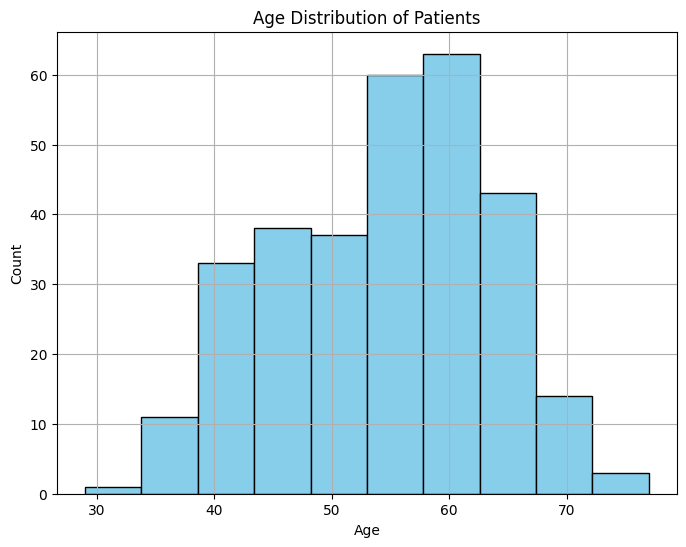

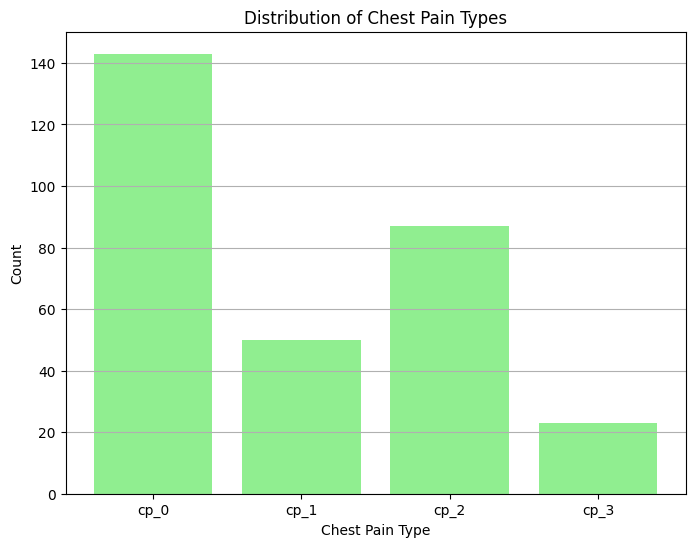

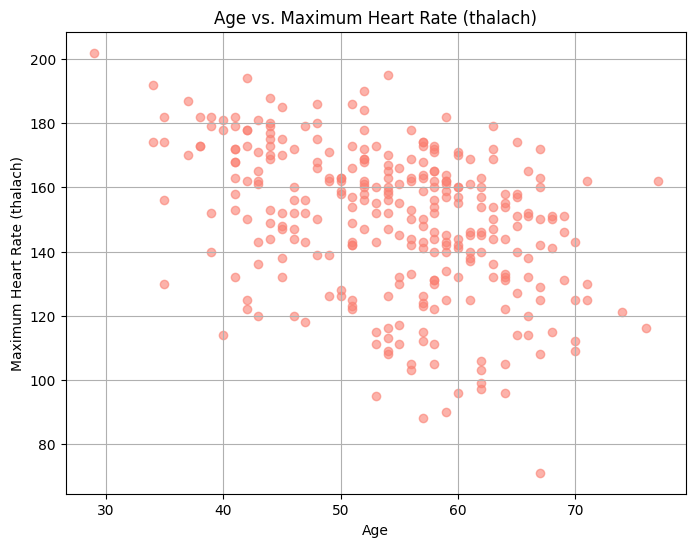

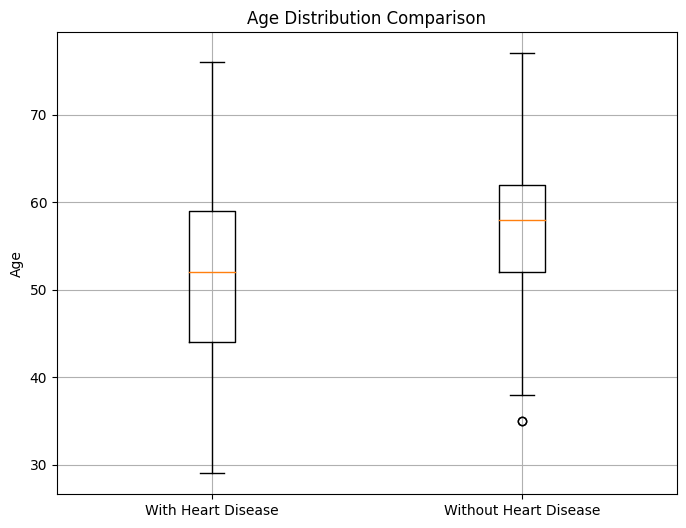

In [7]:
# Plot a histogram of the age distribution of patients
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Create a bar chart showing the distribution of chest pain types among patients
plt.figure(figsize=(8, 6))
plt.bar(chest_pain_distribution.index.astype(str), chest_pain_distribution.values, color='lightgreen')
plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

# Plot a scatter plot to show the relationship between thalach and age
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['thalach'], color='salmon', alpha=0.6)
plt.title('Age vs. Maximum Heart Rate (thalach)')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.grid(True)
plt.show()

# Create a box plot to compare the age distribution of patients with and without heart disease
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['target'] == 1]['age'], df[df['target'] == 0]['age']], labels=['With Heart Disease', 'Without Heart Disease'])
plt.title('Age Distribution Comparison')
plt.ylabel('Age')
plt.grid(True)
plt.show()


4. Advanced Analysis (using numpy)

Correlation Matrix:
                age       sex  trestbps      chol       fbs   thalach  \
age        1.000000 -0.098447  0.279351  0.213678  0.121308 -0.398522   
sex       -0.098447  1.000000 -0.056769 -0.197912  0.045032 -0.044020   
trestbps   0.279351 -0.056769  1.000000  0.123174  0.177531 -0.046698   
chol       0.213678 -0.197912  0.123174  1.000000  0.013294 -0.009940   
fbs        0.121308  0.045032  0.177531  0.013294  1.000000 -0.008567   
thalach   -0.398522 -0.044020 -0.046698 -0.009940 -0.008567  1.000000   
exang      0.096801  0.141664  0.067616  0.067023  0.025665 -0.378812   
oldpeak    0.210013  0.096093  0.193216  0.053952  0.005747 -0.344187   
ca         0.276326  0.118261  0.101389  0.070511  0.137979 -0.213177   
target    -0.225439 -0.280937 -0.144931 -0.085239 -0.028046  0.421741   
cp_0       0.138253  0.089621  0.021447  0.070684 -0.060190 -0.376561   
cp_1      -0.147399 -0.041249 -0.081851 -0.012750 -0.060649  0.248317   
cp_2      -0.059432 -0.116588 -

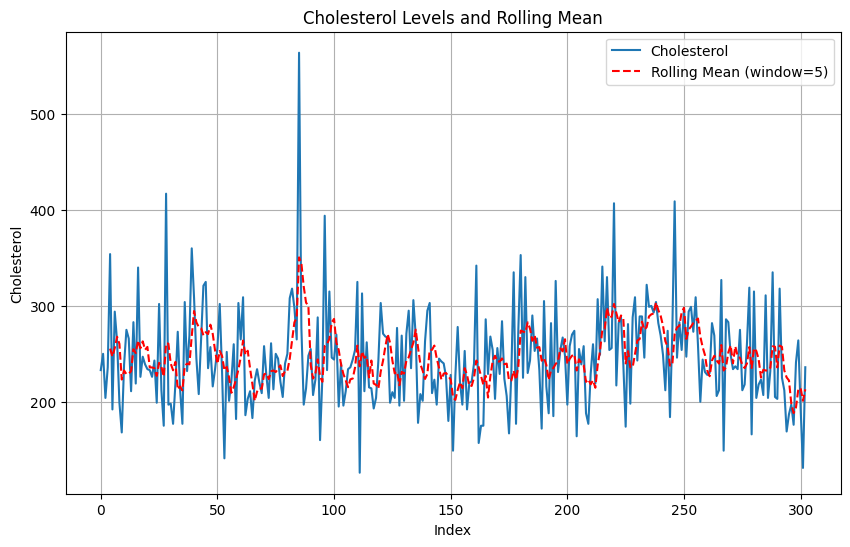

In [8]:
# Calculate the correlation matrix for all numerical features in the dataset
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Perform a rolling mean analysis on the chol levels with a window size of 5 and plot it
rolling_mean_chol = df['chol'].rolling(window=5).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['chol'], label='Cholesterol')
plt.plot(rolling_mean_chol, label='Rolling Mean (window=5)', linestyle='--', color='red')
plt.title('Cholesterol Levels and Rolling Mean')
plt.xlabel('Index')
plt.ylabel('Cholesterol')
plt.legend()
plt.grid(True)
plt.show()

5. Heart disease prediction

In [10]:
def predict_heart_disease(age, chol):
    """
    Function to predict heart disease based on age and cholesterol levels.

    Parameters:
    - age (int or float): Age of the patient.
    - chol (int or float): Cholesterol level of the patient.

    Returns:
    - prediction (int): 1 if heart disease is predicted, 0 otherwise.
    """
    # Define threshold values
    age_threshold = 50
    chol_threshold = 240

    # Apply thresholding rules
    if age > age_threshold and chol > chol_threshold:
        prediction = 1  # Heart disease predicted
    else:
        prediction = 0  # No heart disease predicted

    return prediction

In [13]:
# Example usage of predict_heart_disease function
patient_age = int(input("Enter the patient's age: "))
patient_chol = int(input("Enter the patient's cholesterol level: "))

prediction = predict_heart_disease(patient_age, patient_chol)

if prediction == 1:
    print("Based on the thresholding rules, heart disease is predicted.")
else:
    print("Based on the thresholding rules, no heart disease is predicted.")

Enter the patient's age: 56
Enter the patient's cholesterol level: 270
Based on the thresholding rules, heart disease is predicted.
